# Obsługa danych i podstawy implementacji obliczeń

Korzystając z materiałów dr Drapały pobieram dane z Wikipedii odnośnie najbardziej zaludnionych miast Europy. 

In [27]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

URL = "https://en.wikipedia.org/wiki/List_of_European_cities_by_population_within_city_limits"
resp = requests.get(URL) 
if resp.status_code == 200:
    soup = BeautifulSoup(resp.content,'html.parser')
    tab = soup.find('table',{'class':"wikitable"})
df = pd.read_html(str(tab))[0]
df =df.loc[:, 'City':'Officialpopulation':]
df.replace(to_replace={'[[a]]':"",'[[b]]':""}, regex=True,inplace=True)
df.replace(to_replace='[[,]', value="", regex=True,inplace=True)
for i in range(len(df['Officialpopulation'])):
    df['Officialpopulation'][i] = float("{:.2f}".format(int(df['Officialpopulation'][i])/1000000))
df

,City,Country,Officialpopulation
0,Istanbul,Turkey,15.84
1,Moscow,Russia,12.63
2,London,United Kingdom,9.0
3,Saint Petersburg,Russia,5.38
4,Berlin,Germany,3.66
5,Madrid,Spain,3.31
6,Kyiv,Ukraine,2.92
7,Rome,Italy,2.84
8,Bucharest,Romania,2.16
9,Paris,France,2.14


Po wczytaniu danych, konieczne było usunięcie wystąpień [a],[b] oraz przecinki oddzielające liczby za pomocą metody replace.
Następnie przedstawiam dane na wykresie za pomocą poniższego kodu.

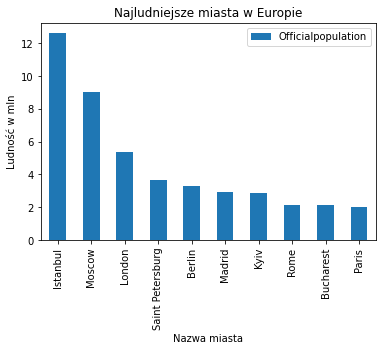

In [17]:
import matplotlib.pyplot as plt

citiesPlot = df.plot(x='City', y='Officialpopulation', kind='bar', title='Najludniejsze miasta w Europie')
plt.xticks(rotation=90)
citiesPlot.set_xlabel('Nazwa miasta')
citiesPlot.set_ylabel('Ludność w mln')
plt.show()

Na zakończenie policzmy średnie zaludnienie w 10. najludniejszych miastach Europy:

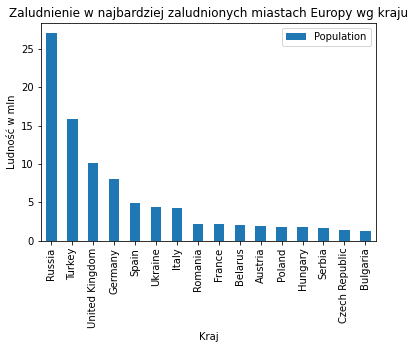

In [88]:
dict = {}
for i in range(len(df)):
    if df["Country"][i] in dict.keys():
        dict[df["Country"][i]] = float(dict[df["Country"][i]]) +float(df["Officialpopulation"][i])
    else:
        dict[df["Country"][i]] = float(df["Officialpopulation"][i])

countries = pd.DataFrame({"Country":dict.keys(),"Population":dict.values()})
countries = countries.sort_values(by=['Population'], ascending = False)
citiesPlot = countries.plot(x='Country', y='Population', kind='bar', title="Zaludnienie w najbardziej zaludnionych miastach Europy wg kraju")
plt.xticks(rotation=90)
citiesPlot.set_xlabel('Kraj')
citiesPlot.set_ylabel('Ludność w mln')
plt.show()

